In [1]:
import boost_histogram as bh
import numpy as np
import matplotlib.pyplot as plt

plothist = lambda h: plt.bar(h.axes[0].centers, h, width=h.axes[0].widths)

# 2: ND Histograms

## 2.1: More dimensions

The same API works for multiple dimensions.

In [2]:
hist3 = bh.Histogram(
    bh.axis.Regular(150, -1.5, 1.5),
    bh.axis.Regular(100, -1, 1)
)

In [3]:
def make_2D_data(*, mean=(0,0), widths=(1,1), size=1_000_000):
    cov = np.asarray(widths) * np.eye(2)
    return np.random.multivariate_normal(mean, cov, size=size).T

In [4]:
data3x = make_2D_data(mean=[-.75, .5], widths=[.2, 0.02])
data3y = make_2D_data(mean=[.75, .5], widths=[.2, 0.02])

From here on out, I will be using `.reset()` before a `.fill()`, just to make sure each cell in the notebook can be rerun.

In [5]:
hist3.reset()
hist3.fill(*data3x)
hist3.fill(*data3y)

Histogram(
  Regular(150, -1.5, 1.5),
  Regular(100, -1, 1),
  storage=Double()) # Sum: 1906071.0 (2000000.0 with flow)

Again, let's make plotting a little function:

In [6]:
def plothist2d(h):
    X, Y = h.axes.edges

    return plt.pcolormesh(X.T, Y.T, h.view().T)

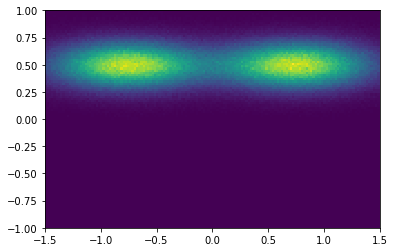

In [7]:
plothist2d(hist3);

Let's try a 3D histogram

In [8]:
data3d = [np.random.normal(size=1_000_000) for _ in range(3)]

hist3d = bh.Histogram(
    bh.axis.Regular(150, -5, 5),
    bh.axis.Regular(100, -5, 5),
    bh.axis.Regular(100, -5, 5)
)

hist3d.fill(*data3d)

Histogram(
  Regular(150, -5, 5),
  Regular(100, -5, 5),
  Regular(100, -5, 5),
  storage=Double()) # Sum: 999999.0 (1000000.0 with flow)

Let's project to the first two axes:

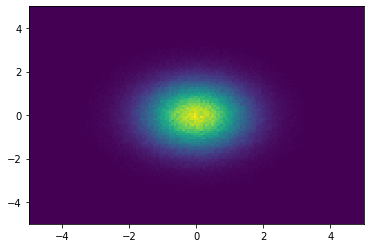

In [9]:
plothist2d(hist3d.project(0,1));

## 2.2: UHI

Let's explore the boost-histogram UHI syntax. We will reuse the previous 2D histogram from part 3:

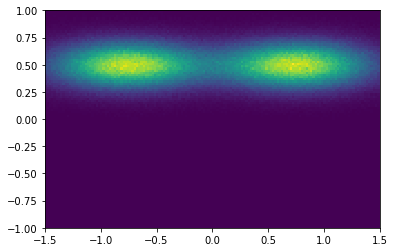

In [10]:
plothist2d(hist3);

I can see that I want y from 0.25 to 0.75, in data coordinates:

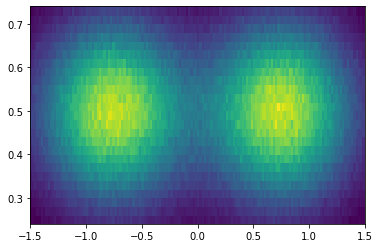

In [11]:
plothist2d(hist3[:, bh.loc(.25):bh.loc(.75)]);

What's the contents of a bin?

In [12]:
hist3[100,87]

196.0

How about in data coordinates?

In [13]:
hist3[bh.loc(.5), bh.loc(.75)]

196.0

> Note: to get the coordinates manually:
> 
> ```python
hist3.axes[0].index(.5) == 100
hist3.axes[1].index(.75) == 87
```

How about a 1d histogram?

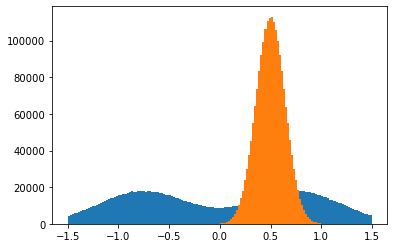

In [14]:
plothist(hist3[:, ::bh.sum]);
plothist(hist3[::bh.sum, :]);

Let's look at one part and rebin:

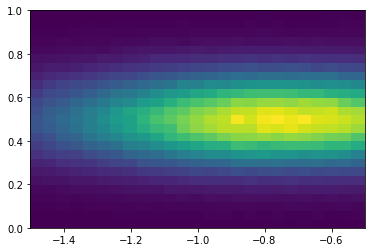

In [15]:
plothist2d(hist3[:50:bh.rebin(2), 50::bh.rebin(2)]);

What is the value at `(-.75, .5)`?

In [16]:
hist3[bh.loc(-.75), bh.loc(.5)]

989.0